#  ALZHEIMERS USING CNN MODEL

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import LSTM, Input, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.models import model_from_json
from imblearn.over_sampling import SMOTE

# Import the backend
from tensorflow.keras import backend as K
import glob
import cv2

import os
#print(os.listdir("../input"))

In [4]:
image = cv2.imread("Alzheimer_s Dataset/train/MildDemented/mildDem1.jpg", cv2.IMREAD_COLOR)

In [5]:
image.shape

(208, 176, 3)

# Import images

In [2]:
images = []
labels = [] 
for dir_path in glob.glob("Alzheimer_s Dataset/train/MildDemented/"):
    label = "MildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
        image = cv2.cvtColor(thresh3, cv2.COLOR_RGB2BGR)
        #image = cv2.Canny(image,100,200)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("Alzheimer_s Dataset/test/MildDemented/"):
    label = "MildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
        image = cv2.cvtColor(thresh3, cv2.COLOR_RGB2BGR)
        #image = cv2.Canny(image,100,200)
        images.append(image)
        labels.append(label)

In [3]:
for dir_path in glob.glob("Alzheimer_s Dataset/train/VeryMildDemented/"):
    label = "VeryMildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
        image = cv2.cvtColor(thresh3, cv2.COLOR_RGB2BGR)
        #image = cv2.Canny(image,100,200)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("Alzheimer_s Dataset/test/VeryMildDemented/"):
    label = "VeryMildDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
        image = cv2.cvtColor(thresh3, cv2.COLOR_RGB2BGR)
        #image = cv2.Canny(image,100,200)
        images.append(image)
        labels.append(label)

In [4]:
for dir_path in glob.glob("Alzheimer_s Dataset/train/ModerateDemented/"):
    label = "ModerateDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
        image = cv2.cvtColor(thresh3, cv2.COLOR_RGB2BGR)
        #image = cv2.Canny(image,100,200)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("Alzheimer_s Dataset/test/ModerateDemented/"):
    label = "ModerateDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
        image = cv2.cvtColor(thresh3, cv2.COLOR_RGB2BGR)
        #image = cv2.Canny(image,100,200)
        images.append(image)
        labels.append(label)

In [5]:
for dir_path in glob.glob("Alzheimer_s Dataset/train/NonDemented/"):
    label = "NonDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
        image = cv2.cvtColor(thresh3, cv2.COLOR_RGB2BGR)
        #image = cv2.Canny(image,100,200)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("Alzheimer_s Dataset/test/NonDemented/"):
    label = "NonDemented"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
        image = cv2.cvtColor(thresh3, cv2.COLOR_RGB2BGR)
        #image = cv2.Canny(image,100,200)
        images.append(image)
        labels.append(label)
images = np.array(images)
labels = np.array(labels)

In [6]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [7]:
id_to_label_dict

{0: 'MildDemented',
 1: 'ModerateDemented',
 2: 'NonDemented',
 3: 'VeryMildDemented'}

In [8]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [9]:
images.shape, label_ids.shape, labels.shape

((6400, 45, 45, 3), (6400,), (6400,))

# Prepare test (20%) and train (80%)

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(images,label_ids, test_size = 0.20)  

In [11]:
X_train

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [12]:
y_train

array([2, 3, 2, ..., 3, 3, 2])

In [13]:
#Normalize color values to between 0 and 1
X_train = X_train/255
X_test = X_test/255


#Make a flattened version for some of our models
X_flat_train = X_train.reshape(X_train.shape[0], 45*45*3)
X_flat_test = X_test.reshape(X_test.shape[0], 45*45*3)

In [14]:
y_train

array([2, 3, 2, ..., 3, 3, 2])

In [15]:
#One Hot Encode the Output
y_train = tensorflow.keras.utils.to_categorical(y_train, 4)
y_test = tensorflow.keras.utils.to_categorical(y_test, 4)

print('Original Sizes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (5120, 45, 45, 3) (1280, 45, 45, 3) (5120, 4) (1280, 4)
Flattened: (5120, 6075) (1280, 6075)


45


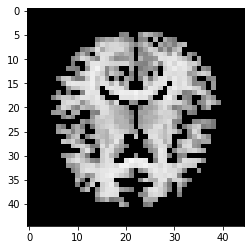

In [30]:
print(train_data.shape[1])
plt.imshow(X_train[0])
plt.show()

# CNN (convolutional Neural Network) Model 

In [31]:
model_cnn = Sequential()
# First convolutional layer, note the specification of shape
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(45, 45, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(4, activation='softmax'))

model_cnn.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_cnn.fit(X_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 5120 samples, validate on 1280 samples
5120/5120 [==============================] - 37s 7ms/sample - loss: 1.4247 - acc: 0.2207 - val_loss: 1.3217 - val_acc: 0.4492
Test loss: 1.3217419773340224
Test accuracy: 0.44921875


In [32]:
model_cnn.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 5120 samples, validate on 1280 samples
Epoch 1/10
5120/5120 [==============================] - 40s 8ms/sample - loss: 1.2807 - acc: 0.4275 - val_loss: 1.2010 - val_acc: 0.4984
Epoch 2/10
5120/5120 [==============================] - 44s 9ms/sample - loss: 1.1896 - acc: 0.4799 - val_loss: 1.1293 - val_acc: 0.4984
Epoch 3/10
5120/5120 [==============================] - 45s 9ms/sample - loss: 1.1314 - acc: 0.4912 - val_loss: 1.0884 - val_acc: 0.4984
Epoch 4/10
5120/5120 [==============================] - 49s 10ms/sample - loss: 1.1040 - acc: 0.4922 - val_loss: 1.0670 - val_acc: 0.4984
Epoch 5/10
5120/5120 [==============================] - 40s 8ms/sample - loss: 1.0847 - acc: 0.4930 - val_loss: 1.0538 - val_acc: 0.4984
Epoch 6/10
5120/5120 [==============================] - 47s 9ms/sample - loss: 1.0783 - acc: 0.4908 - val_loss: 1.0456 - val_acc: 0.4984
Epoch 7/10
5120/5120 [==============================] - 50s 10ms/sample - loss: 1.0740 - acc: 0.4889 - val_loss: 1.0394 - val_acc

# Multi layer neural network with two dense layers

In [33]:
model_dense=Sequential()
# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_dense.add(Dense(128, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model_dense.add(Dropout(0.1))
model_dense.add(Dense(64, activation='relu'))
model_dense.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model_dense.add(Dense(4, activation='softmax'))

model_dense.summary()

# Compile the model to put it all together.
model_dense.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_dense = model_dense.fit(X_flat_train, y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_flat_test, y_test))
score = model_dense.evaluate(X_flat_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               777728    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 786,244
Trainable params: 786,244
Non-trainable params: 0
_________________________________________________________________
Train on 5120 samples, validate on 1280 samples
Epoch 1/10
5120/5120 [==============================] - 2s 294us/s

# Multi layer neural network with five hidden layers

In [34]:
model_deep = Sequential()


# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
# End with a number of units equal to the number of classes we have for our outcome
model_deep.add(Dense(4, activation='softmax'))

model_deep.summary()

# Compile the model to put it all together.
model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(X_flat_train, y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_flat_test, y_test))
score = model_deep.evaluate(X_flat_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               1555456   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

# Multi layer neural network with five hidden layers

In [35]:
model_deep = Sequential()
model_deep.add(Dense(512, activation='relu', input_shape=(X_flat_train.shape[1],)))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(256, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(4, activation='softmax'))

model_deep.summary()

# Compile the model to put it all together.
model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(X_flat_train, y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_flat_test, y_test))
score = model_deep.evaluate(X_flat_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               3110912   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

# Multilayer model

In [36]:
model_deep = Sequential()

model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(4, activation='softmax'))

model_deep.summary()

model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(X_flat_train, y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_flat_test, y_test))
score = model_deep.evaluate(X_flat_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               1555456   
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)              

# Multilayer model

In [44]:
model_deep = Sequential()

model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(4, activation='softmax'))

model_deep.summary()

model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(X_flat_train, y_train,
                          batch_size=128,
                          epochs=28,
                          verbose=1,
                          validation_data=(X_flat_test, y_test))
score = model_deep.evaluate(X_flat_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 256)               1555456   
_________________________________________________________________
dropout_72 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_73 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_74 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 128)             

# Multilayer model

In [39]:
model_deep = Sequential()

model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(4, activation='softmax'))

model_deep.summary()

model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(X_flat_train, y_train,
                          batch_size=128,
                          epochs=15,
                          verbose=1,
                          validation_data=(X_flat_test, y_test))
score = model_deep.evaluate(X_flat_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               1555456   
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)              

# Multilayer model

In [40]:
model_deep = Sequential()

model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(32, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(4, activation='softmax'))

model_deep.summary()

model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(X_flat_train, y_train,
                          batch_size=128,
                          epochs=15,
                          verbose=1,
                          validation_data=(X_flat_test, y_test))
score = model_deep.evaluate(X_flat_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               1555456   
_________________________________________________________________
dropout_43 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_45 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)              

# Multilayer model with oversampling

In [31]:
sm=SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(X_flat_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1 2 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [32]:
print(train_data.shape)

(10260, 6075)


In [20]:
train_data = train_data.reshape(-1, 45, 45, 3)

In [33]:
train_data.shape

(10260, 6075)

In [34]:
model_deep = Sequential()

model_deep.add(Dense(256, activation='relu', input_shape=(train_data.shape[1],)))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(4, activation='softmax'))

model_deep.summary()

model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(train_data, train_labels,
                          batch_size=32,
                          epochs=28,
                          verbose=1,
                          validation_data=(X_flat_test, y_test))
score = model_deep.evaluate(X_flat_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               1555456   
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)              

## Exporting the model to file

In [37]:
model_json = model_deep.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_deep.save_weights("neural_network.h5")